In [42]:
import numpy as np

In [43]:
import pandas as pd

In [44]:
spam_email = '/content/spam_email.csv'

In [45]:
df = pd.read_csv('/content/spam_email.csv' , encoding='latin-1')

In [46]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [49]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [50]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [51]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
encoder=LabelEncoder()

In [54]:
df['target'] = encoder.fit_transform(df['target'])

In [55]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [57]:
df.duplicated().sum()

403

In [58]:
df = df.drop_duplicates(keep='first')

In [59]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [60]:
df.duplicated().sum()

0

In [61]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [62]:
4516/(4516+653)

0.873669955503966

In [63]:
import nltk

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
df['num_characters']=df['text'].apply(len)

<ipython-input-65-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [66]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [67]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [68]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [69]:
df['num_sentances']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

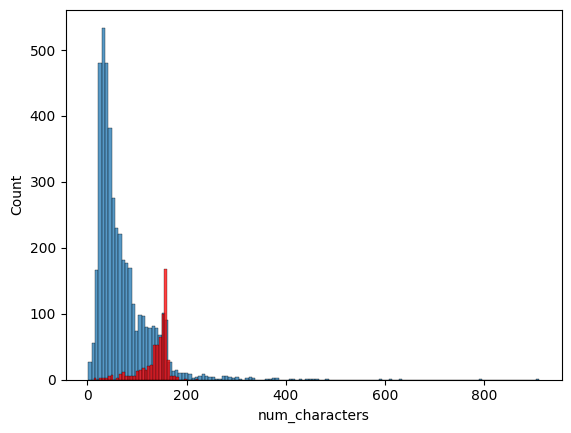

In [72]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

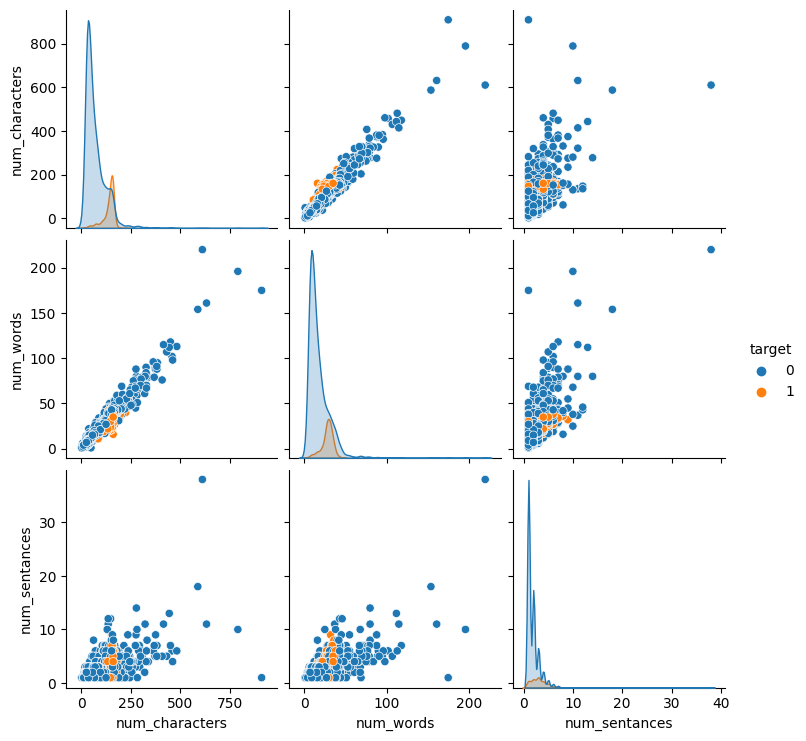

In [73]:
sns.pairplot(df,hue='target')

<ipython-input-74-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

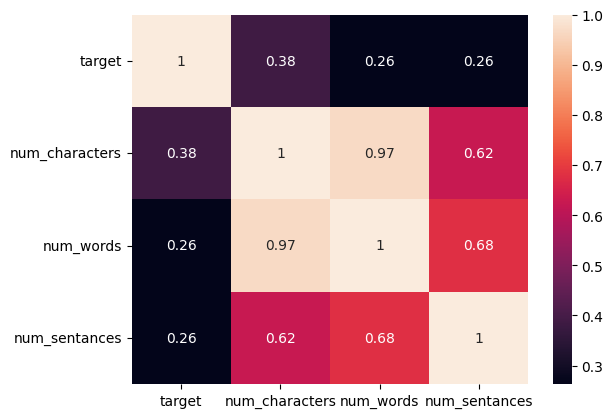

In [74]:
sns.heatmap(df.corr(),annot=True)

There is multi colinearity between number of characters, number of sentances and number of words so we will use only nnumber of characters as a feature instead of all 3

In [75]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [76]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
 def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [79]:
transform_text('My name is Atul, life is ruining')

'name atul life ruin'

In [80]:
transform_text('Nobody is amazed by the Amazing amazes of amazon')

'nobodi amaz amaz amaz amazon'

Lower case
Removal of special characters
Tokenization
Stemming
Are performed

In [81]:
df['transformed_text']=df['text'].apply(transform_text)

In [82]:
df.head()

,target,text,num_characters,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv=CountVectorizer()

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [85]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [100]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [101]:
X.shape

(5169, 6708)

In [102]:
y=df['target'].values

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
from sklearn.naive_bayes import MultinomialNB

In [106]:
mnb=MultinomialNB()

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [108]:
mnb.fit(X_train, y_train)
y_pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))

0.9613152804642167


This is the obtained accuracy for multinomial Naive bayes

In [109]:
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

[[888   1]
 [ 39 106]]
0.9906542056074766


I have tried 2 vectorizers, one is bag of words and other is tf idf. Tf idf is givving a very high precision score so I'll go with it.

Now trying other classifiers as well to check which one should I use.

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dtc=DecisionTreeClassifier(max_depth=100)

In [121]:
dtc.fit(X_train, y_train)
y_pred_dtc=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred_dtc))
print(confusion_matrix(y_test,y_pred_dtc))
print(precision_score(y_test,y_pred_dtc))

0.9477756286266924
[[860  29]
 [ 25 120]]
0.8053691275167785


Decision Trees are not working well, low precision score compared to naive bayes

In [126]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 25, random_state=2)

In [127]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(precision_score(y_test,y_pred_rfc))

0.9690522243713733
[[888   1]
 [ 31 114]]
0.991304347826087


Random Forest is performing very well

In [132]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()


In [133]:
lrc.fit(X_train, y_train)
y_pred_lrc=lrc.predict(X_test)
print(accuracy_score(y_test,y_pred_lrc))
print(confusion_matrix(y_test,y_pred_lrc))
print(precision_score(y_test,y_pred_lrc))

0.9487427466150871
[[883   6]
 [ 47  98]]
0.9423076923076923


In [134]:
X.shape

(5169, 6708)

Using ANN for this classification problem

In [135]:
import tensorflow as tf
from tensorflow import keras

In [139]:
model = keras.Sequential([
    keras.layers.Input(shape=(6708,)),  # Input layer with 6702 features
    keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Predict the labels for the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Epoch 1/10
130/130 [==============================] - 3s 12ms/step - loss: 0.4391 - accuracy: 0.8788 - val_loss: 0.2486 - val_accuracy: 0.9062
Epoch 2/10
130/130 [==============================] - 1s 8ms/step - loss: 0.1534 - accuracy: 0.9528 - val_loss: 0.1193 - val_accuracy: 0.9700
Epoch 3/10
130/130 [==============================] - 1s 8ms/step - loss: 0.0701 - accuracy: 0.9833 - val_loss: 0.0894 - val_accuracy: 0.9758
Epoch 4/10
130/130 [==============================] - 1s 8ms/step - loss: 0.0407 - accuracy: 0.9906 - val_loss: 0.0800 - val_accuracy: 0.9758
Epoch 5/10
130/130 [==============================] - 1s 8ms/step - loss: 0.0265 - accuracy: 0.9947 - val_loss: 0.0757 - val_accuracy: 0.9768
Epoch 6/10
130/130 [==============================] - 1s 11ms/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.0746 - val_accuracy: 0.9778
Epoch 7/10
130/130 [==============================] - 2s 12ms/step - loss: 0.0132 - accuracy: 0.9981 - val_loss: 0.0748 - val_accuracy: 0.9787
Epo

Epoch 1/10
130/130 [==============================] - 5s 23ms/step - loss: 0.3307 - accuracy: 0.8839 - val_loss: 0.1559 - val_accuracy: 0.9584
Epoch 2/10
130/130 [==============================] - 2s 17ms/step - loss: 0.0741 - accuracy: 0.9821 - val_loss: 0.0850 - val_accuracy: 0.9739
Epoch 3/10
130/130 [==============================] - 2s 17ms/step - loss: 0.0173 - accuracy: 0.9959 - val_loss: 0.0857 - val_accuracy: 0.9758
Epoch 4/10
130/130 [==============================] - 2s 13ms/step - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.0890 - val_accuracy: 0.9768
Epoch 5/10
130/130 [==============================] - 2s 12ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0985 - val_accuracy: 0.9768
Epoch 6/10
130/130 [==============================] - 2s 15ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 0.9778
Epoch 7/10
130/130 [==============================] - 1s 8ms/step - loss: 7.2424e-04 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9

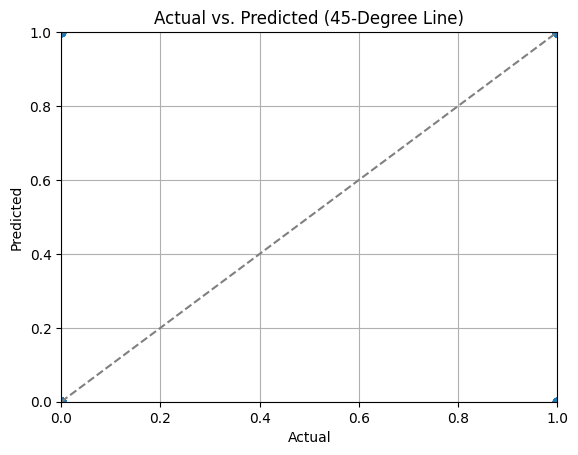

In [142]:
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Input(shape=(6708,)),  # Input layer with 6702 features
    keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Predict the labels for the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

plt.scatter(y_test, y_pred, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 45-degree line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted (45-Degree Line)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

In [144]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9777562862669246
[[883   6]
 [ 17 128]]
0.9552238805970149
